## From HW5, Assignment 1

My homework link: https://github.com/lgladson/PUI2016_lag552/blob/master/HW5_lag552/HW5_Assignment%201_lag552.ipynb

Hers: https://github.com/fedhere/PUI2016_fb55/blob/master/HW5_fb55/solutions/citibikes_goodness_of_fit_solution.ipynb

In [1]:
import pylab as pl
import pandas as pd
import numpy as np

import scipy.stats
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/lag552/PUI2016'

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  35.8M      0 --:--:-- --:--:-- --:--:-- 49.3M


In [4]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
  inflating: 201512-citibike-tripdata.csv  


In [5]:
cmd = "mv 201512-citibike-tripdata.csv " + os.getenv("PUIDATA")
#the line below is to check that my string is formatted right. I should remove it to make the notebook delivery ready
#print (cmd)

In [6]:
os.system(cmd)

0

In [7]:
citi_bike = pd.read_csv(os.getenv('PUIDATA') + '/' + '201512-citibike-tripdata.csv')
citi_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


# BY AGE

In [8]:
# Only want subscriber usertypes; 
# Then within those, want this new column to be the birth year column; 
# and want to get the actual age not the year.
citi_bike['age'] = 2015 - citi_bike['birth year'][(citi_bike['usertype'] == 'Subscriber')]

In [9]:
citi_bike.age[:10]

0    32.0
1    40.0
2    49.0
3    30.0
4    47.0
5    55.0
6    35.0
7    27.0
8    29.0
9    38.0
Name: age, dtype: float64

In [17]:
citi_bike.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name','end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender','start station latitude','start station longitude'], axis=1, inplace=True)
citi_bike.dropna(inplace = True)

In [18]:
citi_bike.head()

,age
0,32.0
1,40.0
2,49.0
3,30.0
4,47.0


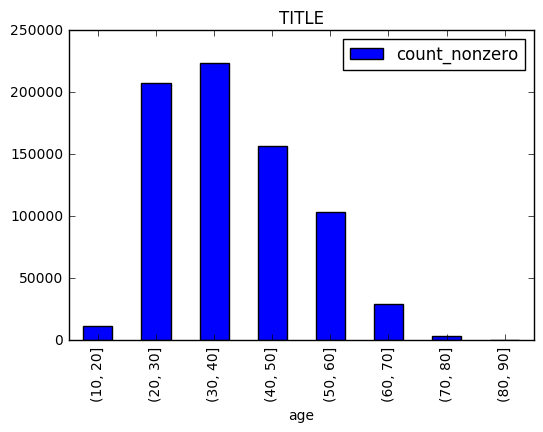

In [19]:
bins = np.arange(10, 99, 10)
citi_bike.age.groupby(pd.cut(citi_bike.age, bins)).\
            agg([count_nonzero]).plot(kind='bar', title="TITLE")

## **K-S Test and Anderson-Darling Tests - for gaussian**

### Null - Dataset distribution fits a gaussian (normal) model

### Alt - Dataset distribution does not fit a normal distribution model. 

Null Hypothesis: The age distribution of citibike drivers fits a gaussian model N($\mu$, $\sigma$), or normal, distribution, alpha = 0.05.

Alternative Hypothesis: The age distribution of citibike drivers does not fit a normal distribution.

# KS TEST - of gaussian distribution

### REDUCING DATASET LENGTH

In [ ]:
print ("data size:", len(citi_bike))
# NOTICE: the data is >1000000 rows! if I just run it through a ks test 
# I stand a good chance to 
# crash my laptop
nuse = 500

KstestResult(statistic=0.99891567067305898, pvalue=0.0)

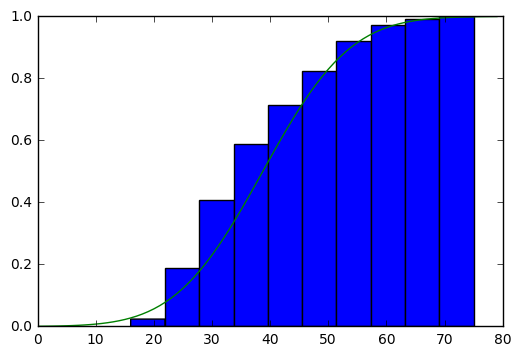

In [26]:
# KS TEST - NORMAL
ksAge = scipy.stats.kstest(citi_bike[::nuse], 'norm', args=(citi_bike.mean(), citi_bike.std()))

# HISTOGRAM - cumulative distribution for the citibike data
pl.hist((citi_bike[::nuse].values), cumulative=True, normed=True)

# LINE - gaussian distribution with same mean and standard deviation as the data
pl.plot(np.arange(0,80), scipy.stats.norm.cdf(np.arange(0,80), loc=citi_bike.mean(), scale=citi_bike.std()))

ksAge

Figure 1: cumulative distribution functions for citibike age data and Gaussian distribution with same mean and standard deviation as the data. The KS test measures the distance in this space

### Conclusions

From the K-S test, we obtain a p-value of 0.0, which is less than where we set our alpha level at 0.05. Therefore, we can reject the null hypothesis and conclude that the age distribution of citibike drivers does **not** fit a normal distribution.


# AD TEST - of gaussian distribution

In [27]:
# AD TEST - NORMAL
adAge = scipy.stats.anderson(citi_bike[::nuse].values.flatten(), dist = 'norm')
adAge

AndersonResult(statistic=19.682031417469716, critical_values=array([ 0.574,  0.654,  0.785,  0.916,  1.089]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### Conclusions

From the A-D test, we obtain test statistic, A, of 9282.8, which is greater the critical value of 0.787 at a significance level of 5% (indeed, it is larger than the critical values at all provided significant levels). Therefore, we can reject the null hypothesis and conclude that the age distribution of citibike drivers does **not** fit a normal distribution.


# KS TEST - of poisson distribution

KstestResult(statistic=0.99999992228526802, pvalue=0.0)

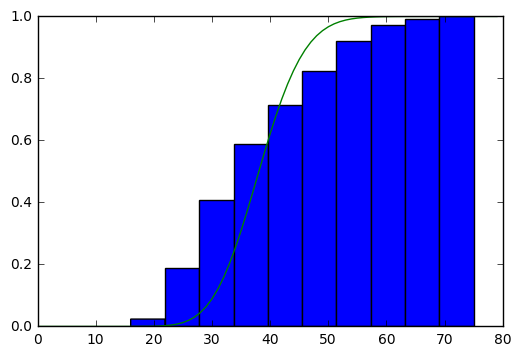

In [28]:
# KS TEST - POISSON
ksAgePois = scipy.stats.kstest(citi_bike[::nuse], 'poisson', args=(citi_bike.mean()))

pl.hist((citi_bike[::nuse].values), cumulative=True, normed=True)
pl.plot(np.arange(0,80), scipy.stats.poisson.cdf(np.arange(0,80), 
                                              mu=citi_bike.mean()))
ksAgePois

cumulative distribution functions for citibike age data and Poisson distribution with same mean as the data. The KS test measures the distance in this space. The cumulative distribution is more dissimilar than it was for the gaussian distribution, as the standard deviation is controlled by the mean, and it is too narrow to describe the data. This is reflected in a higher KS statistics